In [ ]:
# Import libraries
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Read in file
df = pd.read_csv('https://raw.githubusercontent.com/h-aung/Phys206_repo/master/Flint.csv')
df.head()

,Land Value,SL_Type2,Year Built,Commercial Building Value,HomeSEV,Homestead Percent,Land Improvements Value,Latitude,Property Zip Code,Longitude,Parcel Acres,Residential Building Value,SL_Type,Lead (ppb)
0,4959,0,1954,0.0,0,100.0,0,32.819562,48506.0,-96.807295,0.142,14299,1,0.0
1,18319,0,1939,0.0,0,100.0,0,41.612146,48503.0,-83.592350,0.121,90597,1,0.0
2,1640,0,1952,0.0,9000,100.0,0,37.072064,48506.0,-94.510948,0.096,57545,5,0.0
3,17877,0,1942,0.0,18000,100.0,0,43.019594,48503.0,-83.659978,0.115,130230,1,7.0
4,25156,0,1953,0.0,21200,100.0,0,43.012109,48503.0,-83.668858,0.143,112447,1,13.0


In [ ]:
# Create binary variable based of lead level
df["label"] = np.where(df["Lead (ppb)"] >= 15, 1, 0)
df.drop(["Lead (ppb)"], axis=1, inplace=True)

In [ ]:
# Split data into testing and training set
X = df.iloc[:,0:12]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
# Train classifiers
clf1 = SVC().fit(X_train, y_train)
clf2 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

In [ ]:
# Evaluate performance of models
predicted1 = clf1.predict(X_test)
print(
    f"Classification report for classifier {clf1}:\n"
    f"{metrics.classification_report(y_test, predicted1)}\n"
)

predicted2 = clf2.predict(X_test)
print(
    f"Classification report for classifier {clf2}:\n"
    f"{metrics.classification_report(y_test, predicted2)}\n"
)


Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2560
           1       0.00      0.00      0.00       343

    accuracy                           0.88      2903
   macro avg       0.44      0.50      0.47      2903
weighted avg       0.78      0.88      0.83      2903


Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2560
           1       0.17      0.02      0.04       343

    accuracy                           0.87      2903
   macro avg       0.53      0.50      0.48      2903
weighted avg       0.80      0.87      0.83      2903




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[2560    0]
 [ 343    0]]
[[2526   34]
 [ 336    7]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


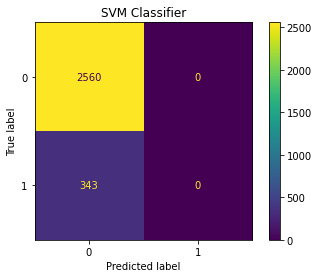

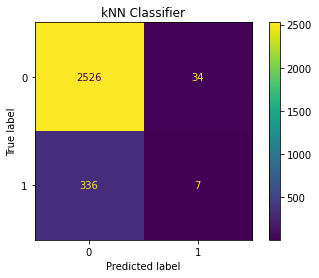

In [ ]:
# Create confusion matrix using test sample
disp = plot_confusion_matrix(clf1, X_test, y_test)
plt.title("SVM Classifier")
print(disp.confusion_matrix)

disp = plot_confusion_matrix(clf2, X_test, y_test)
plt.title("kNN Classifier")
print(disp.confusion_matrix)

In [ ]:
# Train RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=500, random_state=23)
clf.fit(X, y)

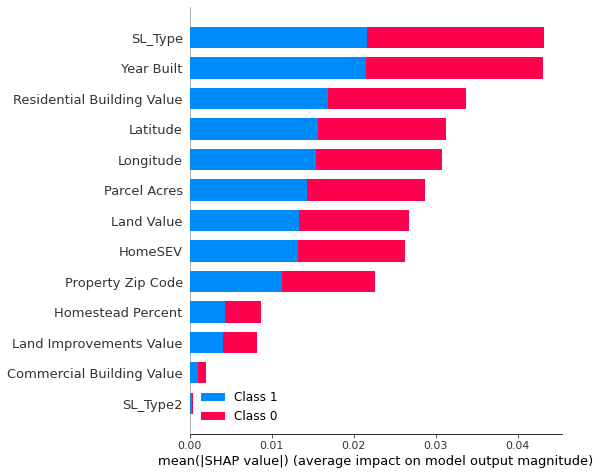

In [ ]:
# Evaluate importance of features using SHAP summary plot
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X[::200])
shap.summary_plot(shap_values, X[::200])

True Class (if 1, Lead PPB > 15, othewise Lead PPB < 15 ): 1
Probability that this data point belong to class 0 = 0.31
Base Probability for class 0 = 0.89


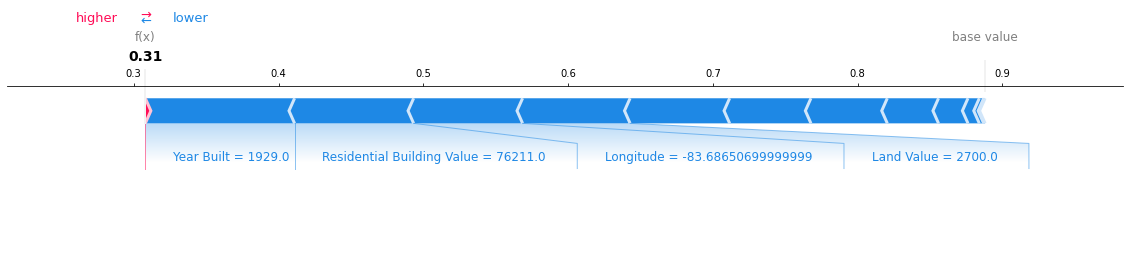

In [ ]:
# Evaluate importance of features for one observation using SHAP force plot
object_i = 33
class_object_i = int(y[::200].iloc[object_i])
print('True Class (if 1, Lead PPB > 15, othewise Lead PPB < 15 ):', class_object_i)
print('Probability that this data point belong to class 0 = %0.2f'%(explainer.expected_value[0] + sum(shap_values[0][object_i,:])))
print('Base Probability for class 0 = %0.2f'%(explainer.expected_value[0]))

shap.force_plot(explainer.expected_value[0],
                shap_values[0][object_i,:],
                X.iloc[object_i,:],
                matplotlib=True)